<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
آمار و احتمال مهندسی
            </font>
			<br />
			<br />
بهار 1401
		</div>
		<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
تمرین دوم عملی
            	<br/>
			</font>
طراحان: علیرضا نوروزی، مهدی جعفری 
			<br/><br/> 
موعد تحویل: 1 اردیبهشت 
                <br/>
                همفکری در تمامی تمرین‌های درس توصیه می‌شود. در عین حال از شما خواسته می‌شود تا تمام پیاده‌سازی را به تنهایی و بدون مشاهده کد دیگران انجام دهید.
                <br/><br/>
                <font color=red>
                لطفا در فایل ارسالی تمام بلوک‌های کد اجرا شده و شامل نمودار‌ها و خروجی‌های لازم باشند.
     </font>
                <br/>
        </style>
	</font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
             سوال اول
        </font>
        <hr/>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       در این تمرین قصد داریم مرحله پلی آف مسابقات NBA را شبیه سازی کنیم.
     هر بازی در مرحله پلی آف به صورت 4از 7 برگزار میشود به این معنی که 2 تیم تا وقتی یکی از بین شان 4 پیروزی کسب کند
        ادامه پیدا میکند.
        حال شما برای شروع کافی است تابعی بنویسید که احتمال برد یک سری از بازی را محاسبه کند.
        میتوانید این سری را 1000 بار تکرار کنید و تعداد باری که تیم با احتمال برد p برنده میشود را گزارش کنید.
        فرض کنید تیم یک در هر بازی به احتمال p برنده میشود.
        و بسکتبال تساوی هم ندارد.
        
</div>

In [20]:
library(ggplot2)
simul <- function(simulN, n, p){
    mean(rbinom(simulN, n, p) > n/2)
}

[1] 6 6 6 6 6

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
        حال برای p های بزرگتر از نیم احتمال برنده شدن سری را محاسبه کنید.
        و نمودار مناسبی برای نمایش این اعداد رسم کنید.
</div>

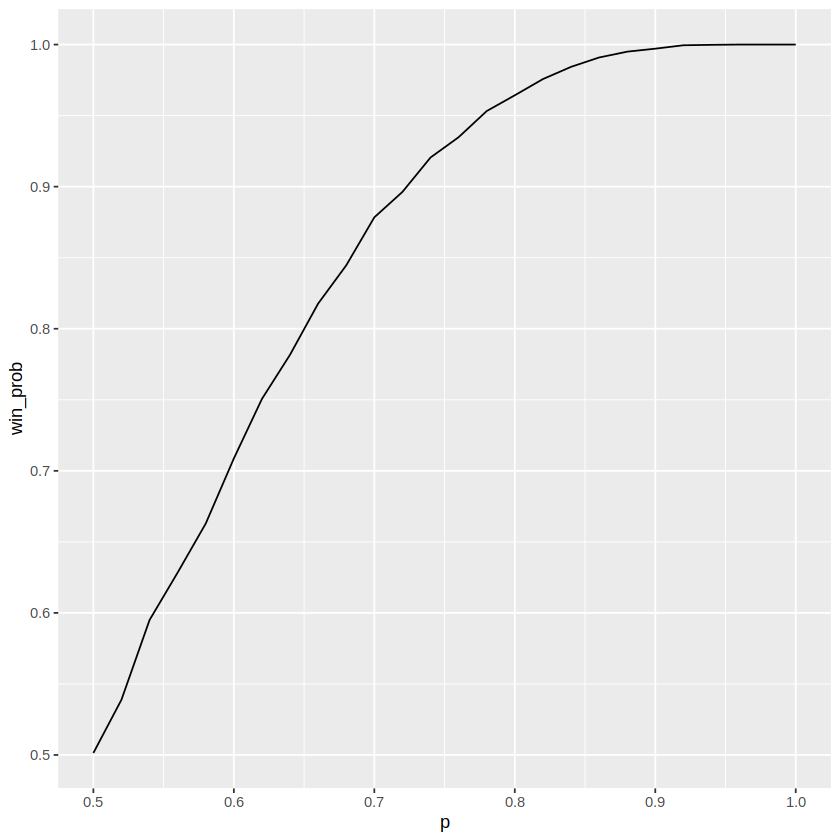

In [24]:
n <- 7
df <- data.frame(p = seq(0.5, 1, length.out = 26), n = n)

simulN <- 10000
df$win_prob <- apply(df, 1, function(x) simul(simulN, x[2], x[1]))

ggplot(data = df, mapping = aes(x = p, y = win_prob)) +
                    geom_line()

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       با رسم نمودار برای n و p های مختلف نشان دهید برای تیم های قوی تر
        هر چه تعداد n بیشتر باشد
        احتمال اینکه یک سری را ببازند کمتر میشود و این نسبت را ببینید، مثلا برای p = 0.6 مقادیر مختلف n را بررسی کنید.
</div>

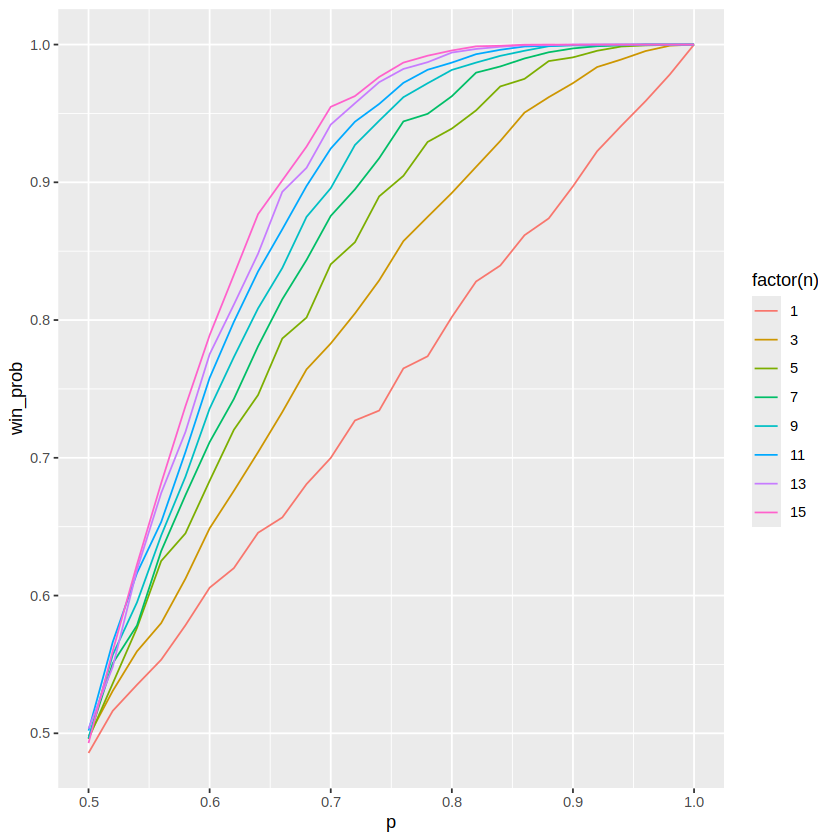

In [38]:
df <- expand.grid(p = seq(0.5, 1, length.out = 26), n = seq(1, 15, length.out = 8))

simulN <- 10000
df$win_prob <- apply(df, 1, function(x) simul(simulN, x[2], x[1]))

ggplot(data = df, mapping = aes(x = p, y = win_prob, col = factor(n))) + geom_line()

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       میدانیم از این 7 سری بازی 4 بازی در زمین تیم 1 و 3 بازی در تیم 2 انجام میشود.
            تابع قسمت قبل را به نحوی باز سازی کنید که هم احتمال برد در خانه و احتمال برد خارج از خانه و اینکه 4 بازی میکند یا 3 بازی را دریافت و مانند تابع قبلی احتمال برد
       سری را حساب کند
</div>

In [4]:
simul <- function(simulN, home_p, notHome_p, four_or_three){
    if(four_or_three == 4){
        more_p <- home_p
        less_p <- notHome_p
    }else{
        more_p <- notHome_p
        less_p <- home_p
    }

    mean(rbinom(simulN, (n+1)/2, more_p) + rbinom(simulN, (n-1)/2, less_p) > n/2)
}

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       به ازای مقادیر مختلف احتمال برد در خانه، احتمال برد در خارج از خانه و تعداد بازی در خانه نمودار مناسبی برای احتمال برد سری رسم کنید.
        برای رسم همه نمودار ها در یکجا درباره facet_wrap() مطالعه کنید.
</div>

In [9]:
home_p <- seq(0, 1, length.out = 51)
notHome_p <- seq(0, 1, length.out = 51)
df <- expand.grid(home_p = home_p, notHome_p = notHome_p, numOfHome = c(4, 3))

set.seed(111)
simN <- 5000
n <- 7
df$win_prob <- apply(df, 1, function(x) simul(simulN, n, as.numeric(x[1]), as.numeric(x[2]), x[3]))
ggplot(df, aes(x = home_p, y = win_prob, col = numOfHome)) +
  geom_line() +
  labs(title = paste("Win probability for best of", n, "series"),
       x = "Win prob for single game", y = "Win prob for series")+ facet_wrap(~ away_p)

ERROR: Error in simul(simulN, n, as.numeric(x[1]), as.numeric(x[2]), x[3]): unused argument (x[3])


<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       
</div>

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
       با استفاده از geom_raster()
        نموداری رسم کنید که تاثیر شروع        
         بازی در خانه یا خارج از خانه را نشان دهد.
 
</div>

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
             سوال دوم 
        </font>
        <hr/>
        <div dir = "rtl" style="direction:rtl;line-height:200%;">
	<font face="XB Zar" size=5>
        در یک فرایند پواسون زمان بین دو اتفاق از یک توزیع نمایی پیروی می‌کند. اگر بخواهیم زمان اتفاق n‌ام را پیش‌بینی کنیم از توزیع گاما استفاده می‌کنیم.
        $$T_n=\sum_{i=1}^n{X_i},\  X_i  s\ are\ i.i.d\ and\ X_i\sim Exp(\lambda)$$
        $$T_n\sim Gamma(n, \lambda)$$
       حال فرض کنید فاصله زمانی ورود دانشجویان به کلاس درس حضوری از توزیع پوآسون پیروی میکند.
        <br>
        الف)
        1000  نمونه تصادفی برای زمان بین ورود دانشجو ها تولید کنید و نمودارهای هیستوگرام داده‌های تولیدشده و چگالی توزیع آن را در یک نمودار رسم کنید.
        نمودار هیستوگرام شما باید چگالی احتمال را برای هر نمونه را نشان دهد.
            </font>
</div>
    </font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        ب)
        بی‌حافظگی توزیع نمایی را با داده‌های تولید شده در قسمت قبل و رسم نمودار به همان شکل نشان دهید.
     </font>
</div>

<div dir = "rtl" style="direction:rtl;line-height:250%;">
	<font face="XB Zar" size=5>
        ج)
       با تولید n=10 متغیرتصادفی نمایی، ویژگی گفته شده در صورت سوال را بررسی کنید. برای این‌کار می‌توانید برای شبیه‌سازی هر متغیرتصادفی مانند قسمت الف عمل کنید. 
     </font>
</div>